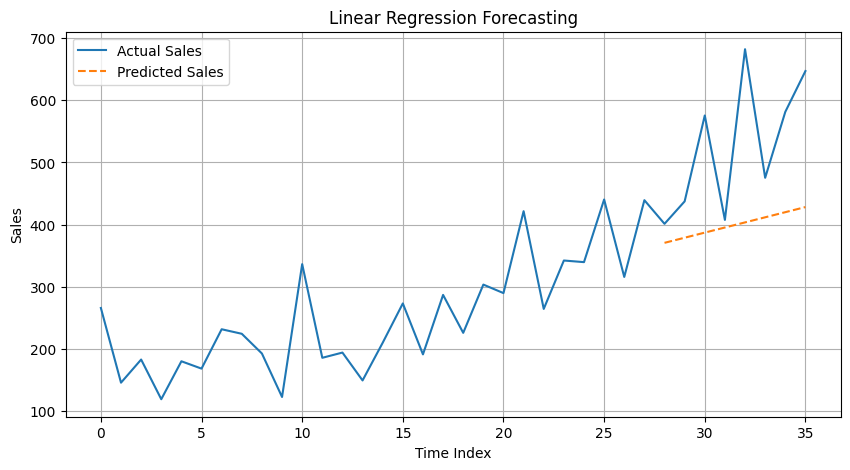

Mean Squared Error: 24420.07


In [5]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Step 2: Load data
df = pd.read_csv('/content/sample_data/sales-of-shampoo-over-a-three-ye (1).csv')
df.columns = ['Month', 'Sales']

# Step 3: Convert Month to datetime and create a time index
df['Month'] = pd.to_datetime(df['Month'], format='%d-%b')
df['Month'] = df['Month'].apply(lambda dt: dt.replace(year=2000 + df.index[df['Month'] == dt][0] // 12))
df['Time_Index'] = np.arange(len(df))

# Step 4: Handle missing or invalid values
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')
df = df.dropna()

# Step 5: Prepare features and target
X = df[['Time_Index']]
y = df['Sales']

# Step 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

# Step 7: Fit Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 8: Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# Step 9: Plot results
plt.figure(figsize=(10,5))
plt.plot(df['Time_Index'], df['Sales'], label='Actual Sales')
plt.plot(X_test, y_pred, label='Predicted Sales', linestyle='--')
plt.title('Linear Regression Forecasting')
plt.xlabel('Time Index')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

# Print MSE
print(f"Mean Squared Error: {mse:.2f}")
